In [1]:
pip install tensorflow

     |████████████████████████████████| 175.5 MB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 63.2 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 77.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 98.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 74.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 79.3 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 18.0 MB/s eta 0:00:01
     |█████████████████████████████

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("./Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/fake_reg.csv")

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


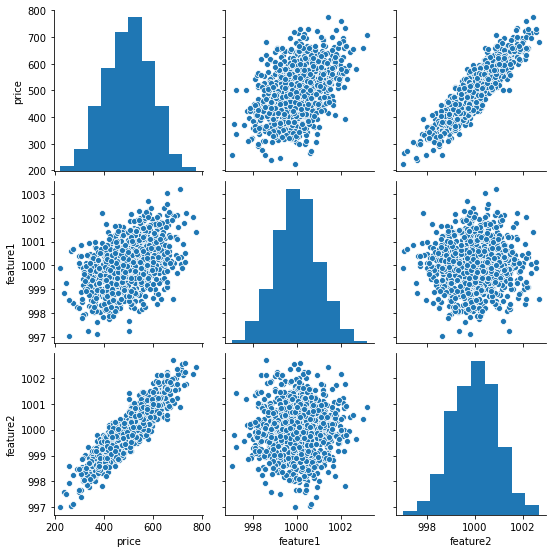

In [6]:
sns.pairplot(df)

In [102]:
from sklearn.model_selection import train_test_split

In [29]:
X=df[['feature1','feature2']].values #tesnorflow needs numpy array can't work with pandas df
y=df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
#help(MinMaxScaler)
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
#model=Sequential([Dense(4,activation='relu'),
                 #Dense(2,activation='relu'),
                 #Dense(1)])

In [35]:
model=Sequential() #easy to comment out layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [36]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 690us/step - loss: 254373.3308
Epoch 2/250
22/22 [==============================] - 0s 754us/step - loss: 253725.8499
Epoch 3/250
22/22 [==============================] - 0s 757us/step - loss: 254993.9497
Epoch 4/250
22/22 [==============================] - 0s 736us/step - loss: 253859.9524
Epoch 5/250
22/22 [==============================] - 0s 729us/step - loss: 256214.9633
Epoch 6/250
22/22 [==============================] - 0s 678us/step - loss: 254968.7262
Epoch 7/250
22/22 [==============================] - 0s 700us/step - loss: 255001.3757
Epoch 8/250
22/22 [==============================] - 0s 709us/step - loss: 258836.6664
Epoch 9/250
22/22 [==============================] - 0s 709us/step - loss: 255870.4321
Epoch 10/250
22/22 [==============================] - 0s 741us/step - loss: 255039.0000
Epoch 11/250
22/22 [==============================] - 0s 640us/step - loss: 256757.3166
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 663us/step - loss: 502.5573
Epoch 189/250
22/22 [==============================] - 0s 661us/step - loss: 496.7951
Epoch 190/250
22/22 [==============================] - 0s 649us/step - loss: 431.2678
Epoch 191/250
22/22 [==============================] - 0s 699us/step - loss: 441.2859
Epoch 192/250
22/22 [==============================] - 0s 758us/step - loss: 444.9102
Epoch 193/250
22/22 [==============================] - 0s 716us/step - loss: 379.0380
Epoch 194/250
22/22 [==============================] - 0s 728us/step - loss: 391.4026
Epoch 195/250
22/22 [==============================] - 0s 719us/step - loss: 383.7845
Epoch 196/250
22/22 [==============================] - 0s 732us/step - loss: 373.8918
Epoch 197/250
22/22 [==============================] - 0s 728us/step - loss: 360.6868
Epoch 198/250
22/22 [==============================] - 0s 696us/step - loss: 328.1468
Epoch 199/250
22/22 [==============================] - 0s 725us/step

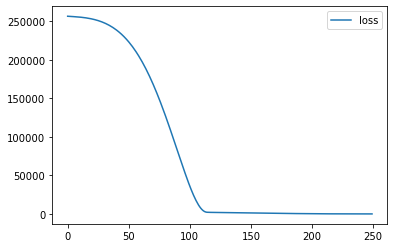

In [37]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [38]:
model.evaluate(X_test,y_test,verbose=0)

26.019472122192383

In [39]:
model.evaluate(X_train,y_train,verbose=0)

25.07469940185547

In [46]:
pred=model.predict(X_test)
pred=pd.Series(pred.reshape(300,))
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])
pred_df=pd.concat([pred_df,pred],axis=1)
pred_df.columns=['Test True Y','Model predictions']
pred_df.head()

,Test True Y,Model predictions
0,402.296319,405.919006
1,624.156198,622.236694
2,582.455066,590.871338
3,578.588606,571.915405
4,371.224104,368.617218


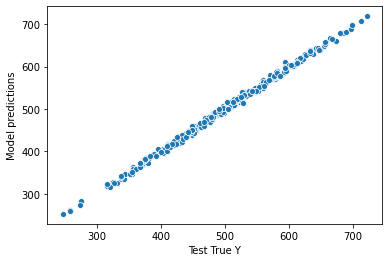

In [47]:
sns.scatterplot(pred_df['Test True Y'],pred_df['Model predictions'])

In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,confusion_matrix

In [49]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model predictions'])

4.1342844065671445

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


In [51]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model predictions'])

26.019482806541642

In [52]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model predictions'])**0.5

5.100929602194255

In [53]:
new_gem=[[998,1000]]

In [54]:
new_gem=scaler.transform(new_gem)

In [55]:
model.predict(new_gem)

array([[421.14474]], dtype=float32)

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save('my_gem_model1.h5')

In [58]:
later_model=load_model('my_gem_model1.h5')

In [59]:
later_model.predict(new_gem)

array([[421.14474]], dtype=float32)

In [62]:
df=pd.read_csv("./Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


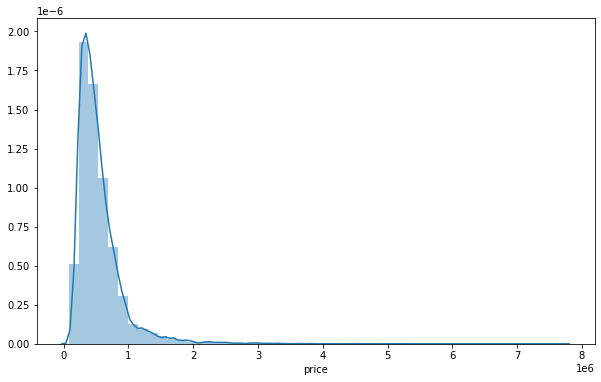

In [73]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

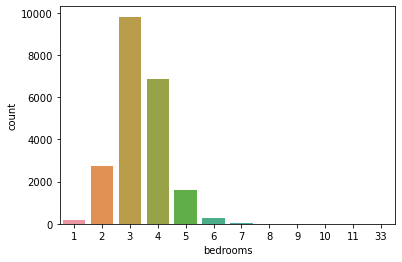

In [74]:
sns.countplot(df['bedrooms'])

In [78]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

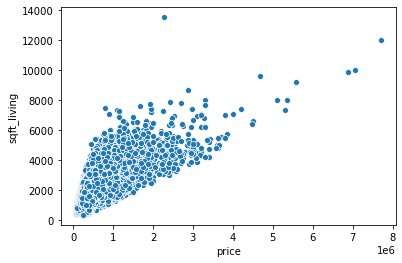

In [79]:
sns.scatterplot(x='price',y='sqft_living',data=df)

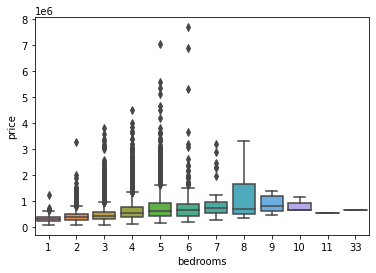

In [81]:
sns.boxplot(y='price',x='bedrooms',data=df)

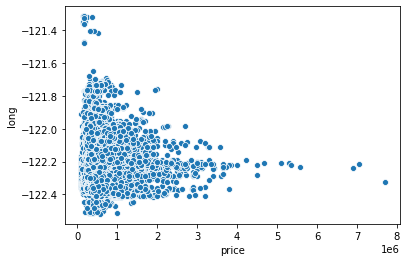

In [82]:
sns.scatterplot(x='price',y='long',data=df)

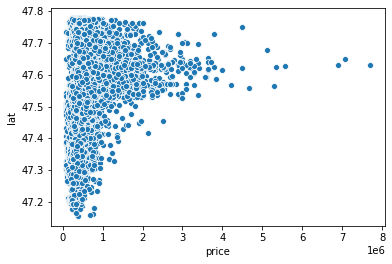

In [83]:
sns.scatterplot(x='price',y='lat',data=df)

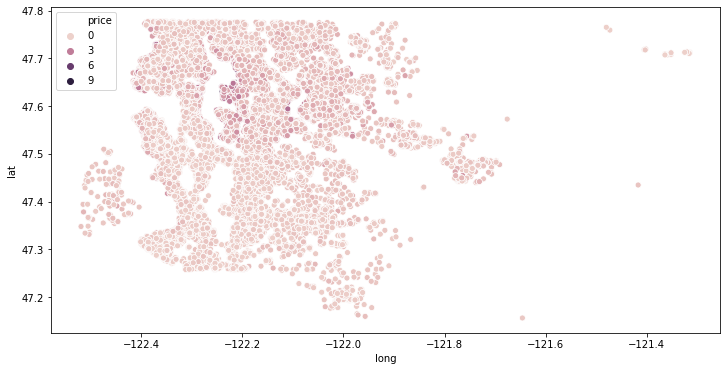

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [89]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [90]:
len(df)

21597

In [95]:
non_top1=df.sort_values('price',ascending=False).iloc[216:]
non_top1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


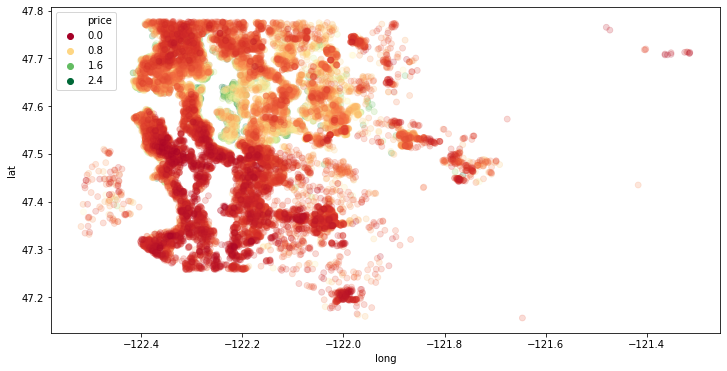

In [99]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=non_top1,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

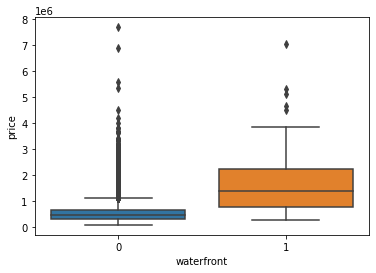

In [100]:
sns.boxplot(x='waterfront',y='price',data=df)

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [104]:
df=df.drop('id',axis=1)
df['date']=pd.to_datetime(df['date'])

In [105]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [108]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


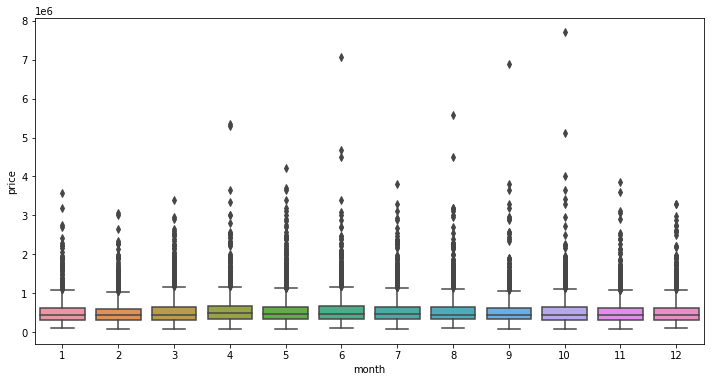

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='price',data=df)

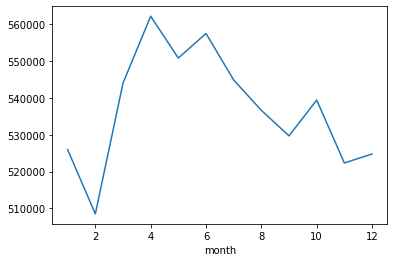

In [114]:
df.groupby('month').mean()['price'].plot()

In [115]:
df=df.drop('date',axis=1)

In [118]:
#df['zipcode'].value_counts() $more geographical data needed

In [119]:
df=df.drop('zipcode',axis=1)

In [120]:
df['yr_renovated'].value_counts() #acts as continuous

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [121]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [135]:
X=df.drop('price',axis=1).values
y=df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [136]:
sc=MinMaxScaler()

In [137]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [138]:
md=Sequential()
md.add(Dense(19,activation='relu'))
md.add(Dense(19,activation='relu'))
md.add(Dense(19,activation='relu'))
md.add(Dense(19,activation='relu'))
md.add(Dense(1))
md.compile(optimizer='adam',loss='mse')

In [139]:
md.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 441803925094.4000 - val_loss: 418933932032.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 440142006681.6000 - val_loss: 415480971264.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 419231899921.0667 - val_loss: 382745968640.0000
Epoch 4/400
119/119 [==============================] - 0s 964us/step - loss: 374223025766.4000 - val_loss: 269876084736.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 242189640635.7333 - val_loss: 126527832064.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 124158166562.1333 - val_loss: 95555969024.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 103848527257.6000 - val_loss: 93921394688.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 96366095496.5333 - val_loss: 92391604224.0000
Epoch 9/400
119/11

Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 38554185796.2667 - val_loss: 36733181952.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 38880946858.6667 - val_loss: 36611002368.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 37916638071.4667 - val_loss: 36513284096.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37000854852.2667 - val_loss: 36351135744.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 35591627451.7333 - val_loss: 36345565184.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 40050206037.3333 - val_loss: 36157779968.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 39003944994.1333 - val_loss: 36156432384.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 40747153066.6667 - val_loss: 36000636928.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33009148177.0667 - val_loss: 32314718208.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 35170846464.0000 - val_loss: 32266244096.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32102137395.2000 - val_loss: 32329811968.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 35469937800.5333 - val_loss: 32270938112.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 34431034589.8667 - val_loss: 32156211200.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 36812749909.3333 - val_loss: 32135825408.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33412119022.9333 - val_loss: 32115777536.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 31498400187.7333 - val_loss: 32032907264.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31541063936.0000 - val_loss: 29014765568.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 33221219413.3333 - val_loss: 29018908672.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30879768422.4000 - val_loss: 29049380864.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 31247021858.1333 - val_loss: 28992139264.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30079240806.4000 - val_loss: 28993263616.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30163353992.5333 - val_loss: 29122852864.0000
Epoch 273/400
119/119 [==============================] - 0s 915us/step - loss: 30171845683.2000 - val_loss: 29039331328.0000
Epoch 274/400
119/119 [==============================] - 0s 988us/step - loss: 31732574259.2000 - val_loss: 28964904960.0000
Epoch 275/400
119/119 [===

119/119 [==============================] - 0s 1ms/step - loss: 30923538995.2000 - val_loss: 27864483840.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 30646245137.0667 - val_loss: 27749998592.0000


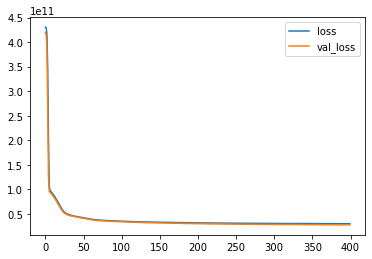

In [140]:
ls=pd.DataFrame(md.history.history)
ls.plot()

In [141]:
pr=md.predict(X_test)

In [142]:
mean_absolute_error(y_test,pr)

103120.93830295138

In [145]:
np.sqrt(mean_squared_error(y_test,pr))

166583.31495868857

In [147]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [149]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,pr)

0.7907518049718298

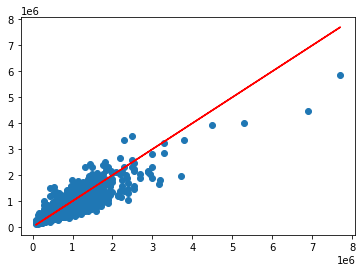

In [151]:
plt.scatter(y_test,pr)
plt.plot(y_test,y_test,'r')

In [160]:
nh=df.drop('price',axis=1).iloc[0]
nh=sc.transform(nh.values.reshape(-1,19)) #converting to numpy array
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [159]:
md.predict(nh)

array([[282993.7]], dtype=float32)

In [167]:
nh1=df.drop('price',axis=1).iloc[0]
nh1.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [2]:
df=pd.read_csv('./Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


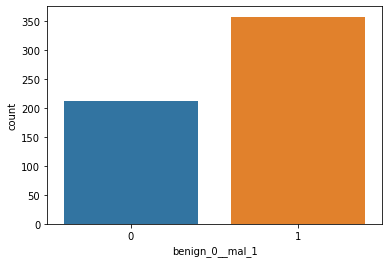

In [6]:
sns.countplot(df['benign_0__mal_1'])

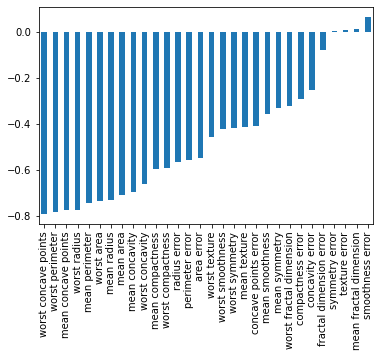

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

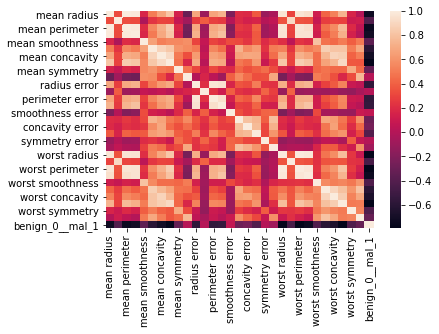

In [12]:
sns.heatmap(df.corr())

In [17]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
sc5=MinMaxScaler()

In [19]:
X_train=sc5.fit_transform(X_train)

In [20]:
X_test=sc5.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
md=Sequential()
md.add(Dense(30,activation='relu'))
md.add(Dense(15,activation='relu'))
md.add(Dense(1,activation='sigmoid'))
md.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
md.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6743 - val_loss: 0.6483
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6339 - val_loss: 0.6017
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5938 - val_loss: 0.5576
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5480 - val_loss: 0.5119
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4894 - val_loss: 0.4629
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4501 - val_loss: 0.4148
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3947 - val_loss: 0.3679
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3572 - val_loss: 0.3292
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3346 - val_loss: 0.2988
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2944 - val_loss: 0.2709
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.1187
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.1215
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 0.1210
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1195
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.1257
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0576 - val_loss: 0.1187
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.1245
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.1210
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.1270
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1222


14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.1376
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0467 - val_loss: 0.1446
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.1330
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.1688
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0466 - val_loss: 0.1411
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.1434
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.1477
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1432
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.1411
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.1463
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.1895
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.1697
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.2133
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1761
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1932
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.1738
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.1985
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.1819
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1973
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.1909
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.2710
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.2525
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.2765
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.2323
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.2896
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.2928
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.2490
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.2848
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.2493
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.2695
Epoc

In [27]:
ls1=pd.DataFrame(md.history.history)

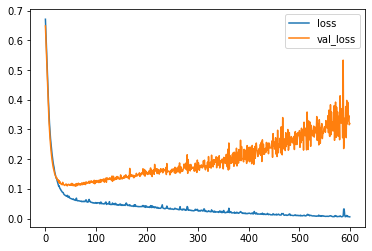

In [29]:
ls1.plot()

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
es1=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [32]:
md1=Sequential()
md1.add(Dense(30,activation='relu'))
md1.add(Dense(15,activation='relu'))
md1.add(Dense(1,activation='sigmoid'))
md1.compile(optimizer='adam',loss='binary_crossentropy')

In [33]:
md1.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[es1])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6928 - val_loss: 0.6678
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6608 - val_loss: 0.6302
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6293 - val_loss: 0.5965
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5952 - val_loss: 0.5613
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5530 - val_loss: 0.5236
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5182 - val_loss: 0.4785
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4704 - val_loss: 0.4314
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4279 - val_loss: 0.3807
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3853 - val_loss: 0.3372
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3528 - val_loss: 0.3023
Epoch 11/

In [34]:
ls2=pd.DataFrame(md1.history.history)

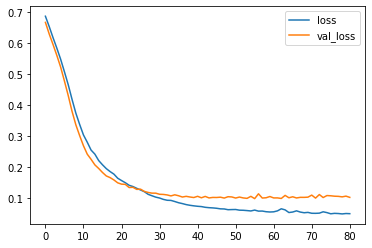

In [35]:
ls2.plot()

In [46]:
md2=Sequential()
md2.add(Dense(30,activation='relu'))
md2.add(Dropout(0.5))
md2.add(Dense(15,activation='relu'))
md2.add(Dropout(0.5))
md2.add(Dense(1,activation='sigmoid'))
md2.compile(optimizer='adam',loss='binary_crossentropy')

In [47]:
md2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[es1])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7123 - val_loss: 0.6756
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7042 - val_loss: 0.6568
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6838 - val_loss: 0.6423
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6430 - val_loss: 0.6204
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6356 - val_loss: 0.5971
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6236 - val_loss: 0.5706
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5902 - val_loss: 0.5426
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5913 - val_loss: 0.5183
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5533 - val_loss: 0.4952
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5377 - val_loss: 0.4704
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1199 - val_loss: 0.0952
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1313 - val_loss: 0.0952
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1229 - val_loss: 0.0935
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1118 - val_loss: 0.0934
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0911 - val_loss: 0.0950
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1225 - val_loss: 0.0990
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1217 - val_loss: 0.0914
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1463 - val_loss: 0.0874
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 0.1061
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1313 - val_loss: 0.0845
Epoch 93/600


In [48]:
ls3=pd.DataFrame(md2.history.history)

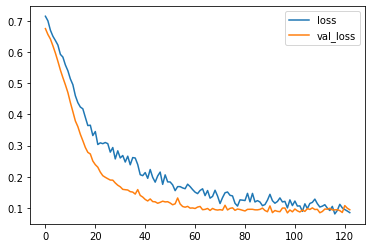

In [49]:
ls3.plot()

In [50]:
pred=md2.predict_classes(X_test)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [52]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]


In [2]:
dfi=pd.read_csv('./Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
dfi.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [4]:
def feat_info(c):
    print(dfi.loc[c]['Description']) 

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
df=pd.read_csv('./Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

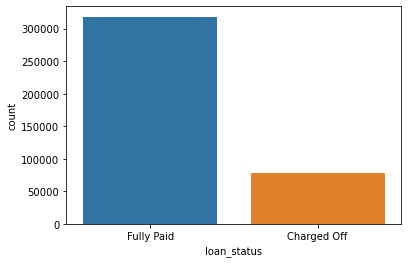

In [8]:
sns.countplot(df['loan_status'])

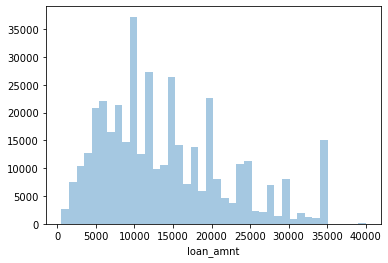

In [9]:
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


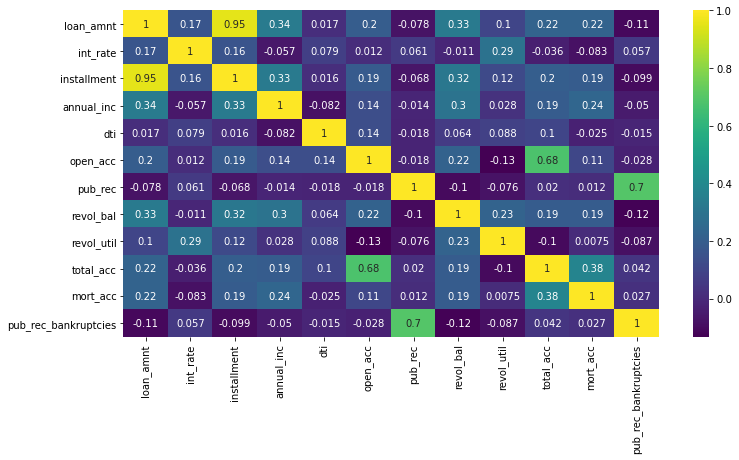

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
#plt.ylim(10,0) #use if fig is cutoff

In [12]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


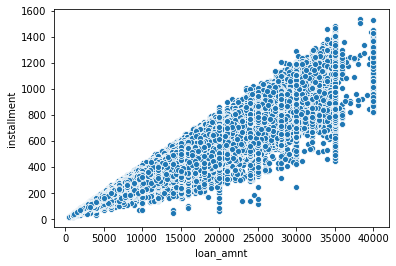

In [14]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

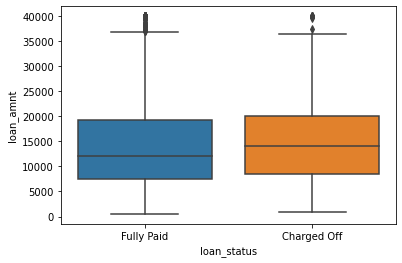

In [15]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [16]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

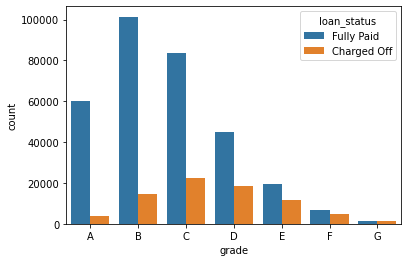

In [19]:
g_order=sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order=g_order)

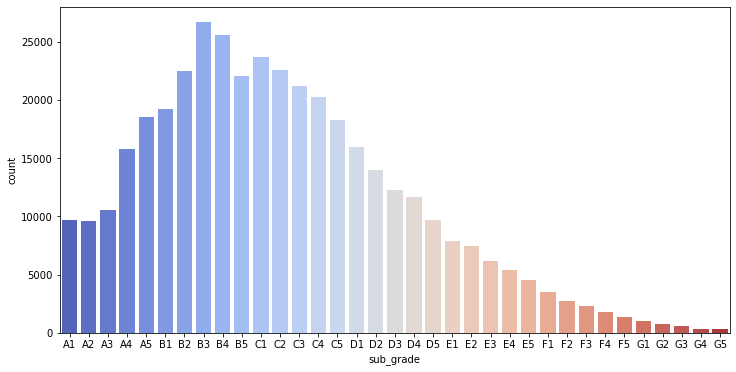

In [20]:
plt.figure(figsize=(12,6))
sg_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sg_order,palette='coolwarm')

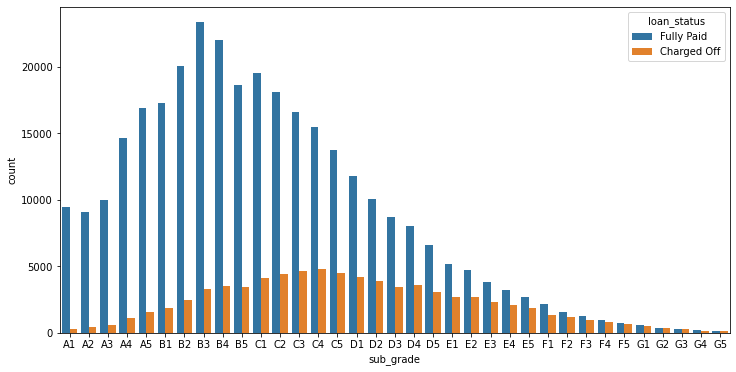

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=sg_order)

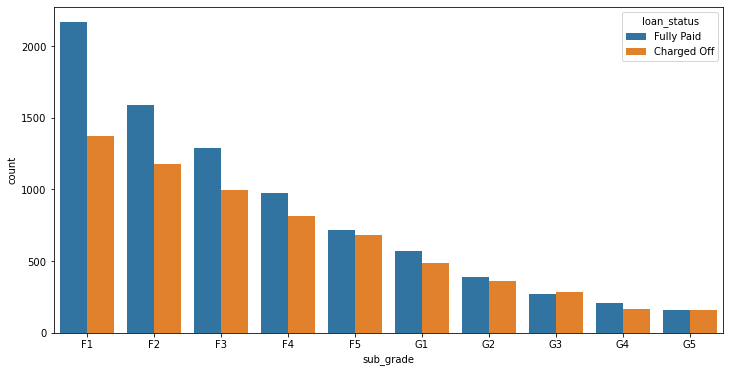

In [22]:
fg=df[(df['grade']=='F') | (df['grade']=='G')]
sg_order=sorted(fg['sub_grade'].unique())
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=fg,hue='loan_status',order=sg_order)

In [23]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


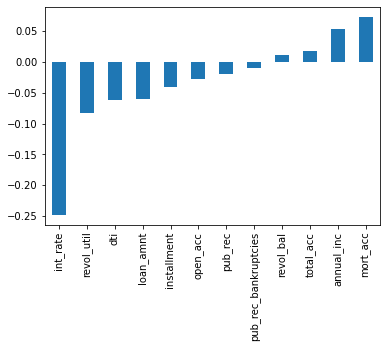

In [24]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar') #.drop('loan_repaid')

In [25]:
len(df)

396030

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
100*df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

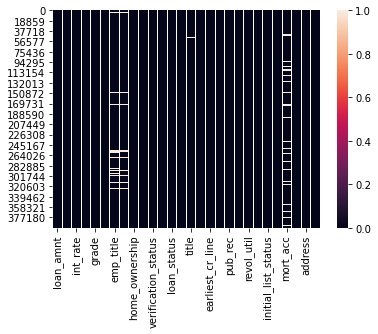

In [28]:
sns.heatmap(df.isnull())

In [29]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [30]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
Facilities Mechanic                     1
Glace Associates                        1
55 E Ontario Street Restaurant Co       1
unitemp                                 1
Registered Nurse - Supervisor           1
Name: emp_title, Length: 173105, dtype: int64

In [33]:
df=df.drop('emp_title',axis=1)

In [34]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

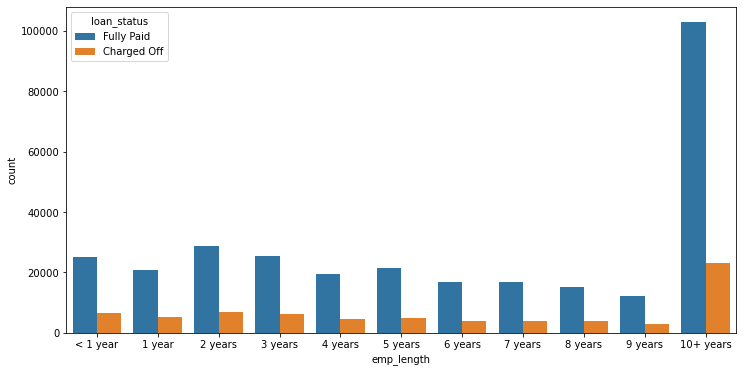

In [35]:
e_order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',hue='loan_status',data=df,order=e_order)

In [36]:
df['emp_length'][df['loan_repaid']==0].value_counts() /df['emp_length'].value_counts()

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

In [37]:
df=df.drop('emp_length',axis=1)

In [38]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [40]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [41]:
df=df.drop('title',axis=1)

In [42]:
feat_info('mort_acc')

Number of mortgage accounts.


In [43]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [44]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [45]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
ma_avg=df.groupby('total_acc').mean()['mort_acc']

In [47]:
def fill_ma(ta,ma):
    if np.isnan(ma):
        return ma_avg[ta]
    else:
        return ma

In [48]:
df['mort_acc']=df.apply(lambda x: fill_ma(x['total_acc'],x['mort_acc']),axis=1)

In [49]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [50]:
df=df.dropna()

In [51]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [52]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [53]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [56]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [61]:
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [62]:
df=df.drop('grade',axis=1)

In [67]:
dum=pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dum],axis=1)

In [68]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [70]:
dum=pd.get_dummies(df[['purpose','initial_list_status','application_type','verification_status']],drop_first=True)
df=pd.concat([df.drop(['purpose','initial_list_status','application_type','verification_status'],axis=1),dum],axis=1)

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'OTH

In [75]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [74]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [77]:
dum=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dum],axis=1)

In [79]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [87]:
df['zip_code']=df['address'].apply(lambda a: a [-5:])

In [88]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [89]:
dum=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop('zip_code',axis=1),dum],axis=1)

In [90]:
df=df.drop('address',axis=1)

In [91]:
feat_info('issue_d')

The month which the loan was funded


In [95]:
df=df.drop('issue_d',axis=1)

In [96]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [100]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda a: a [-4:])

In [101]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1950        3
1951        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [107]:
df=df.drop('loan_status',axis=1)

In [ ]:
#can use sampling to avoid rma issues
#df=df.sample(frcac=0.1,random_state=101)

In [109]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [110]:
sc=MinMaxScaler()

In [111]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [112]:
X_train.shape

(316175, 78)

In [115]:
#es1=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

md=Sequential()
md.add(Dense(78,activation='relu'))
md.add(Dropout(0.2))
md.add(Dense(39,activation='relu'))
md.add(Dropout(0.2))
md.add(Dense(19,activation='relu'))
md.add(Dropout(0.2))
md.add(Dense(1,activation='sigmoid'))
md.compile(optimizer='adam',loss='binary_crossentropy')

In [117]:
md.fit(x=X_train,y=y_train,epochs=25, batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3628 - val_loss: 0.2648
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2670 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2628 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2602 - val_loss: 0.2624
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2609 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2603 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2597 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2594 - val_loss: 0.2620
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2594 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.256

In [119]:
md.save('lcmd.hs')

INFO:tensorflow:Assets written to: lcmd.hs/assets


In [123]:
ls=pd.DataFrame(md.history.history)

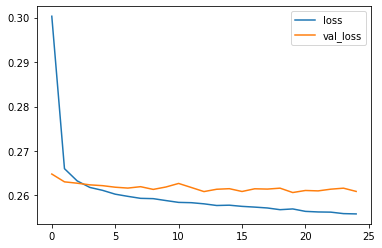

In [125]:
ls.plot()

In [126]:
pred=md.predict_classes(X_test)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [129]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6887  8771]
 [  108 63278]]


In [184]:
es1=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

md1=Sequential()
md1.add(Dense(78,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(39,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(19,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(10,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(39,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(19,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(10,activation='relu'))
md1.add(Dropout(0.3))
md1.add(Dense(1,activation='sigmoid'))
md1.compile(optimizer='adam',loss='binary_crossentropy')

In [185]:
md1.fit(x=X_train,y=y_train,epochs=200, batch_size=128,validation_data=(X_test,y_test),callbacks=es1)

Epoch 1/200
2471/2471 [==============================] - 4s 1ms/step - loss: 0.4108 - val_loss: 0.3265
Epoch 2/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3258 - val_loss: 0.3080
Epoch 3/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3191 - val_loss: 0.2975
Epoch 4/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3158 - val_loss: 0.2982
Epoch 5/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3148 - val_loss: 0.2896
Epoch 6/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3132 - val_loss: 0.2945
Epoch 7/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3109 - val_loss: 0.2958
Epoch 8/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3095 - val_loss: 0.2940
Epoch 9/200
2471/2471 [==============================] - 3s 1ms/step - loss: 0.3104 - val_loss: 0.2883
Epoch 10/200
2471/2471 [==============================] - 3s 1ms/step - l

In [139]:
import random
random.seed(101)
random_ind=random.randint(0,len(df))

nc=df.drop('loan_repaid',axis=1).iloc[random_ind]
nc

loan_amnt       25000
term               60
int_rate        18.24
installment    638.11
annual_inc      61665
                ...  
30723               1
48052               0
70466               0
86630               0
93700               0
Name: 305323, Length: 78, dtype: object

In [144]:
nc=sc.transform(nc.values.reshape(1,78))

In [146]:
md.predict_classes(nc)

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [150]:
df.iloc[random_ind]['loan_repaid']

1

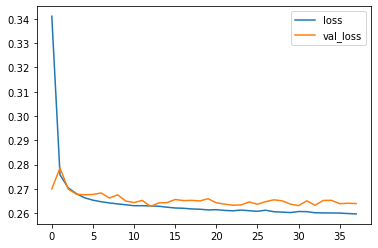

In [182]:
ls=pd.DataFrame(md1.history.history)
ls.plot()

In [183]:
pred1=md1.predict_classes(X_test)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6720  8938]
 [    0 63386]]
